# Image reshaping for Tensorflow

References: 
- https://www.tensorflow.org/api_docs/python/tf/image/resize_images 
- https://learningtensorflow.com/lesson3/
- https://stackoverflow.com/questions/39952592/tf-image-decode-jpeg-raise-invalidargumenterror

Type:  <class 'numpy.ndarray'>
Shape:  <class 'tuple'>
X:  <tf.Variable 'x:0' shape=(268, 189, 3) dtype=float32_ref>


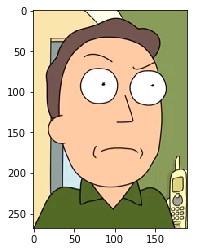

In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
image = mpimg.imread("jerry.png")

print("Type: ", type(image))
print("Shape: ", type(image.shape))

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
print("X: ", x)

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    result = session.run(x)
    
plt.imshow(result)
plt.show()

Initial shape:  (268, 189, 3)
Rescaled image to contain 10 rows and 7 columns
Resized Shape:  (10, 7, 3)


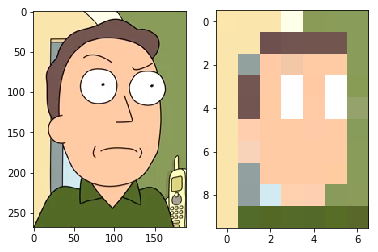

In [12]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image and graph the shape of the image.
image = mpimg.imread("jerry.png")
original_shape = image.shape

# Read the image using tf's file reading method
file_contents = tf.read_file("jerry.png")
decoded_image = tf.image.decode_png(file_contents, dtype=tf.uint8, channels=3)   

# Set the shape of the image as this is unknown.
decoded_image.set_shape(original_shape)
print("Initial shape: ", decoded_image.get_shape())

# Set a rescale value
rescale_percentage = 0.04
rescaled_row = int(original_shape[0] * rescale_percentage)
rescaled_col = int(original_shape[1] * rescale_percentage)

print("Rescaled image to contain %s rows and %s columns" % (rescaled_row, rescaled_col))

resize_shape = tf.stack([rescaled_row,rescaled_col])
resized_image = tf.image.resize_images(
    decoded_image, 
    resize_shape,
    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
)
print("Resized Shape: ", resized_image.get_shape())

# # Create a TensorFlow Variable
x = tf.Variable(decoded_image, name='x')
y = tf.Variable(resized_image, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    original = session.run(x)
    resized = session.run(y)
        
fig, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(resized)
plt.show()